In [1]:
groups3<-read.csv('try.csv')

In [2]:
groups3

subgroup,ID,recurrence,PFS,survival,OS
<int>,<int>,<chr>,<int>,<chr>,<int>
2,2537821,none,317,alive,317
2,2518780,none,608,alive,608
2,1,recurrent,168,alive,263
2,2,recurrent,58,alive,258
2,5,recurrent,78,deceased,166
2,7,none,206,alive,206
3,2520263,recurrent,39,deceased,48
3,2393116,none,870,alive,870
3,4,recurrent,226,alive,251


In [3]:
library('survival')
library('survminer')

Loading required package: ggplot2

Loading required package: ggpubr



In [4]:
groups3$survival2<-gsub('alive',1,groups3$survival)
groups3$survival2<-gsub('deceased',2,groups3$survival2)

In [5]:
groups3

subgroup,ID,recurrence,PFS,survival,OS,survival2
<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
2,2537821,none,317,alive,317,1
2,2518780,none,608,alive,608,1
2,1,recurrent,168,alive,263,1
2,2,recurrent,58,alive,258,1
2,5,recurrent,78,deceased,166,2
2,7,none,206,alive,206,1
3,2520263,recurrent,39,deceased,48,2
3,2393116,none,870,alive,870,1
3,4,recurrent,226,alive,251,1


In [6]:
groups3$survival2<-as.numeric(groups3$survival2)
groups3$OS<-as.numeric(groups3$OS)

In [7]:
attach(groups3)
fit <- survfit(Surv(OS, survival2) ~ subgroup)
summary(fit)

Call: survfit(formula = Surv(OS, survival2) ~ subgroup)

                subgroup=2 
        time       n.risk      n.event     survival      std.err lower 95% CI 
     166.000        6.000        1.000        0.833        0.152        0.583 
upper 95% CI 
       1.000 

                subgroup=3 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   48      4       1     0.75   0.217        0.426            1
  154      3       1     0.50   0.250        0.188            1


In [8]:
options(repr.plot.height=6,repr.plot.width=6)

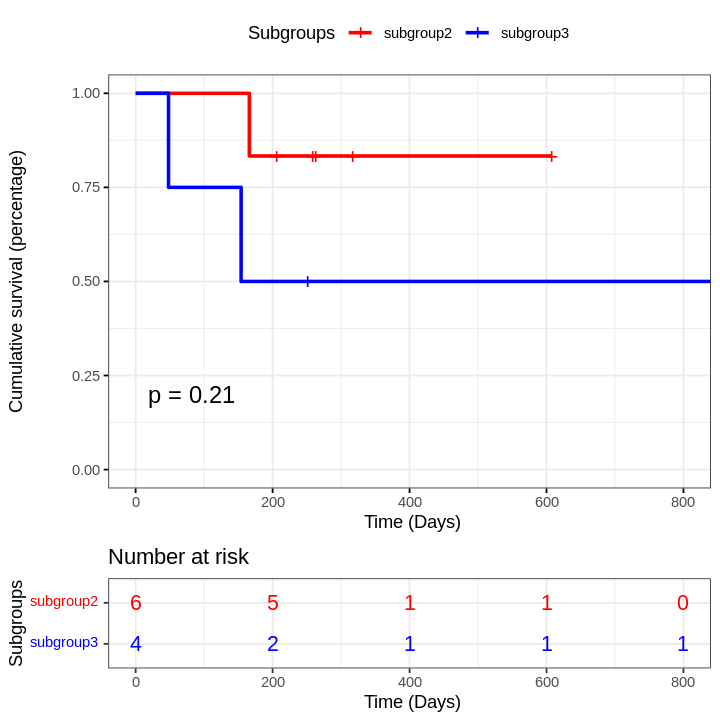

In [9]:
ggsurvplot(fit, data = groups3,
           pval = T, # 在图上添加log rank检验的p值
         #  conf.int = T,# 添加置信区间
           risk.table = T, # 在图下方添加风险表
           legend.labs=c("subgroup2","subgroup3"), #表头标签注释男女
           legend.title="Subgroups",#表头标签
           ylab="Cumulative survival (percentage)",xlab = " Time (Days)",#修改X轴Y轴名称
           risk.table.col = "strata", # 风险表加颜色
       #    linetype = "strata", # 生存曲线的线型
       #    surv.median.line = "hv", # 标注出中位生存时间
           ggtheme = theme_bw(), #背景布局
           palette = c("red", "blue")) # 图形颜色风格

In [10]:
pdf("OS.pdf",width=5.5,height=5)
ggsurvplot(fit, data = groups3,
           pval = T, # 在图上添加log rank检验的p值
         #  conf.int = T,# 添加置信区间
           risk.table = T, # 在图下方添加风险表
           legend.labs=c("subgroup2","subgroup3"), #表头标签注释男女
           legend.title="Subgroups",#表头标签
           ylab="Cumulative survival (percentage)",xlab = " Time (Days)",#修改X轴Y轴名称
           risk.table.col = "strata", # 风险表加颜色
       #    linetype = "strata", # 生存曲线的线型
       #    surv.median.line = "hv", # 标注出中位生存时间
           ggtheme = theme_bw(), #背景布局
           palette = c("red", "blue")) # 图形颜色风格
dev.off()

png 
  2

In [11]:
groups3<-read.csv('try.csv')

In [12]:
groups3

subgroup,ID,recurrence,PFS,survival,OS
<int>,<int>,<chr>,<int>,<chr>,<int>
2,2537821,none,317,alive,317
2,2518780,none,608,alive,608
2,1,recurrent,168,alive,263
2,2,recurrent,58,alive,258
2,5,recurrent,78,deceased,166
2,7,none,206,alive,206
3,2520263,recurrent,39,deceased,48
3,2393116,none,870,alive,870
3,4,recurrent,226,alive,251


In [13]:
groups3$survival2<-gsub('none',1,groups3$recurrence)
groups3$survival2<-gsub('recurrent',2,groups3$survival2)

In [14]:
groups3

subgroup,ID,recurrence,PFS,survival,OS,survival2
<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
2,2537821,none,317,alive,317,1
2,2518780,none,608,alive,608,1
2,1,recurrent,168,alive,263,2
2,2,recurrent,58,alive,258,2
2,5,recurrent,78,deceased,166,2
2,7,none,206,alive,206,1
3,2520263,recurrent,39,deceased,48,2
3,2393116,none,870,alive,870,1
3,4,recurrent,226,alive,251,2


In [15]:
groups3$survival2<-as.numeric(groups3$survival2)
groups3$PFS<-as.numeric(groups3$PFS)

In [16]:
attach(groups3)
fit <- survfit(Surv(PFS, survival2) ~ subgroup)
summary(fit)

The following objects are masked from groups3 (pos = 3):

    ID, OS, PFS, recurrence, subgroup, survival, survival2




Call: survfit(formula = Surv(PFS, survival2) ~ subgroup)

                subgroup=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   58      6       1    0.833   0.152        0.583            1
   78      5       1    0.667   0.192        0.379            1
  168      4       1    0.500   0.204        0.225            1

                subgroup=3 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   39      4       1     0.75   0.217       0.4259            1
   62      3       1     0.50   0.250       0.1877            1
  226      2       1     0.25   0.217       0.0458            1


In [17]:
options(repr.plot.height=6,repr.plot.width=6)

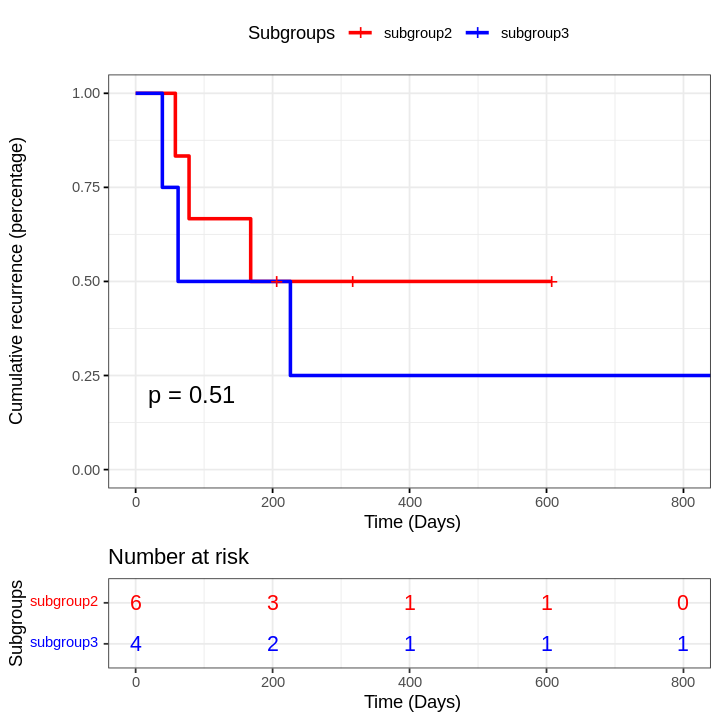

In [18]:
ggsurvplot(fit, data = groups3,
           pval = T, # 在图上添加log rank检验的p值
         #  conf.int = T,# 添加置信区间
           risk.table = T, # 在图下方添加风险表
           legend.labs=c("subgroup2","subgroup3"), #表头标签注释男女
           legend.title="Subgroups",#表头标签
           ylab="Cumulative recurrence (percentage)",xlab = " Time (Days)",#修改X轴Y轴名称
           risk.table.col = "strata", # 风险表加颜色
       #    linetype = "strata", # 生存曲线的线型
       #    surv.median.line = "hv", # 标注出中位生存时间
           ggtheme = theme_bw(), #背景布局
           palette = c("red", "blue")) # 图形颜色风格

In [19]:
pdf("PFS.pdf",width=5.5,height=5)
ggsurvplot(fit, data = groups3,
           pval = T, # 在图上添加log rank检验的p值
         #  conf.int = T,# 添加置信区间
           risk.table = T, # 在图下方添加风险表
           legend.labs=c("subgroup2","subgroup3"), #表头标签注释男女
           legend.title="Subgroups",#表头标签
           ylab="Cumulative recurrence (percentage)",xlab = " Time (Days)",#修改X轴Y轴名称
           risk.table.col = "strata", # 风险表加颜色
       #    linetype = "strata", # 生存曲线的线型
       #    surv.median.line = "hv", # 标注出中位生存时间
           ggtheme = theme_bw(), #背景布局
           palette = c("red", "blue")) # 图形颜色风格
dev.off()

png 
  2